# Exercise Session: Logistic Regression
$\renewcommand{\real}{\mathbb{R}}$
$\renewcommand{\xb}{\mathbf{x}}$
$\renewcommand{\wb}{\mathbf{w}}$
$\renewcommand{\Xb}{\mathbf{X}}$
$\renewcommand{\yb}{\mathbf{y}}$
$\renewcommand{\Yb}{\mathbf{Y}}$
$\DeclareMathOperator*{\argmin}{argmin}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# project files
import sys
sys.path.append('..')
import helpers as helpers

# 3rd party
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# 1 Introduction

This week's exercise is about linear classification, in particular, logistic regression. We will focus on the binary classification scenario, i.e., two classes.

# 2 Binary Classification with Logistic Regression

Let's start by loading the [_Iris Flower Dataset_](https://en.wikipedia.org/wiki/Iris_flower_data_set). To facilitate visualization, we will only use 2 out of the 4 features of this dataset. Furthermore, we will use 2 out of the 3 classes in this dataset, named *setosa* and *versicolor*. Therefore, for this part our dataset with two classes is as follows:

  - data: $\Xb \in \real^{N \times 3}$, $\forall \xb_i \in \Xb: \xb_i \in \real^{3}$ (2 features and the bias)
  - labels: $\yb \in \real^{N}$, $\forall y_i \in \yb: y_i \in \{0, 1\}$ 

Note that $\Xb$ is a matrix of shape $(N \times (D+1))$. However, a single data sample $\xb_i$ is a column vector of shape $((D+1) \times 1)$. 
To compute a scalar product of one data sample with the weight vector $\wb$ (also a column vector of shape $((D+1) \times 1)$), we write $\xb_i^\top\cdot\wb$. To perform a matrix-vector multiplication of the entire data matrix with the weight vector, we write $\Xb\cdot\wb$.

<IPython.core.display.Javascript object>


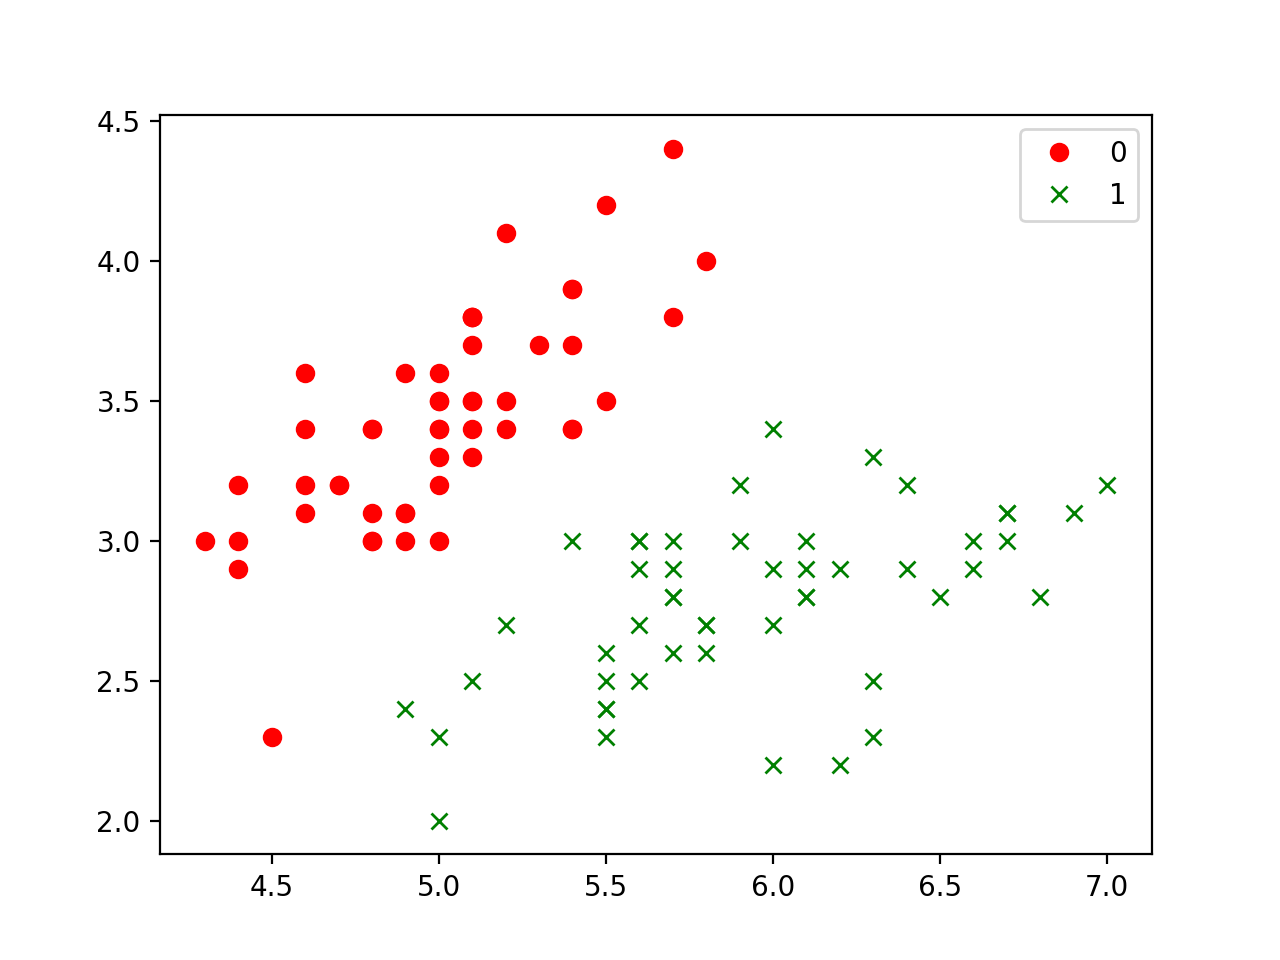

In [2]:
# Loads the data and split them into training and test subsets.
data, labels = helpers.load_ds_iris(sep_l=True, sep_w=True, pet_l=False, pet_w=False,
                              setosa=True, versicolor=True, virginica=False, addbias=True)
fig = helpers.scatter2d_multiclass(data, labels)

num_samples = data.shape[0]

fraction_train = 0.8
np.random.seed(0)
rinds = np.random.permutation(num_samples)

data_train = data[rinds[:int(num_samples * fraction_train)]] 
labels_train = labels[rinds[:int(num_samples * fraction_train)]]  

data_test = data[rinds[int(num_samples * fraction_train):]] 
labels_test = labels[rinds[int(num_samples * fraction_train):]]  

## 2.1 Short introduction

In logistic regression, the probability (score) that a data point belongs to the positive class is expressed as
$$P(y_i=1|\xb_i, \wb) = \frac{1}{1+e^{-\xb_i^{\top}\cdot \wb}} $$

This relies on the sigmoid function is defined as
$$\sigma(t)= \frac{1}{1+e^{-t}}$$

So in our case, the prediction of our model is defined as
$$\hat{y}(\xb_i)=\sigma(\xb_i^{\top}\cdot \wb)= \frac{1}{1+e^{-\xb_i^{\top}\cdot \wb}}$$

Let us code this function. You can use the numpy function `np.exp(x)` to take the exponential of a number.

In [4]:
def sigmoid(t):
    """ Sigmoid function
    
    Args:
        t (np.array): Input data of shape (N, )
        
    Returns:
        np.array: Probabilites of shape (N, ), where each value is in [0, 1].
    """
    return 1/(1 + np.exp(-t))

Recall that the cross entropy loss is defined as:
$$
R(\wb) = -\sum_i (y_i \log(\hat{y}(\xb_i)) + (1-y_i)\log(1-\hat{y}(\xb_i))) $$

Let's code it using NumPy. If you do it correctly, it can be written in one line!

In [5]:
def loss_logistic(data, labels, w): 
    """ Logistic regression loss function for binary classes
    
    Args:
        data (np.array): Dataset of shape (N, D).
        labels (np.array): Labels of shape (N, ).
        w (np.array): Weights of logistic regression model of shape (D, )
    Returns:
        int: Loss of logistic regression.
    """    
    return -np.sum(labels * np.log(sigmoid(data @ w)) + (1 - labels) * np.log(1 - sigmoid(data @ w)))

To move the weight vector towards the optimal weights, we need to compute the gradient of the loss function. This gradient is defined as
$$\nabla R(\wb)= \sum_i (\hat{y}(\xb_i) - y_i)\xb_i $$
Let us put this into a nice matrix format:
$$\nabla R(\wb)= \Xb^\top(\hat{y}(\Xb) - \yb) = \Xb^\top(\sigma(\Xb\cdot \wb) - \yb),
$$

where $\hat{y}(\Xb) = \sigma(\Xb\cdot \wb)$ and $\sigma(\Xb\cdot \wb)$ computes the sigmoid for each data sample separately, and returns a vector of shape $(N \times 1)$.

Fill in the function for computing the gradient `gradient_logistic()`. You can use the numpy function `np.dot()` or an operator `@` for matrix multiplication.

In [6]:
def gradient_logistic(data, labels, w):
    """ Logistic regression gradient function for binary classes
    
    Args:
        data (np.array): Dataset of shape (N, D).
        labels (np.array): Labels of shape (N, ).
        w (np.array): Weights of logistic regression model of shape (D, )
    Returns:
        np. array: Gradient array of shape (D, )
    """
    return data.T.dot(sigmoid(data.dot(w))-labels)

## 2.2 Classification using a logistic regression model

Now let us write a function to perform classification using logistic regression, `logistic_regression_classify()`. This function uses the weights we find during training to predict the labels for the data.

**Hints:**
* We classify our data according to $P(y_i=1|\xb_i, \wb)$. If the value of $P(y_i=1|\xb_i, \wb)$ is less than 0.5 then the data point is classified as label 0. If it is more than or equal to 0.5 then we classify the data point as label 1.

In [7]:
def logistic_regression_classify(data, w):
    """ Classification function for binary class logistic regression. 
    
    Args:
        data (np.array): Dataset of shape (N, D).
        w (np.array): Weights of logistic regression model of shape (D, )
    Returns:
        np.array: Label assignments of data of shape (N, )
    """
    #### write your code here: find predictions and threshold.
    predictions = sigmoid(data@w)
    predictions[predictions<0.5]=0
    predictions[predictions>=0.5]=1        
    return predictions

We measure the performance of our classifier with *accuracy* metric. It is defined as $$ f_{\text{acc}} = \frac{\text{# correct predictions}}{\text{# all predictions}}$$
Implement the following `accuracy()` function using the predicted and ground truth labels.

In [9]:
def accuracy(labels_gt, labels_pred):
    """ Computes accuracy.
    
    Args:
        labels_gt (np.array): GT labels of shape (N, ).
        labels_pred (np.array): Predicted labels of shape (N, ).
        
    Returns:
        float: Accuracy, in range [0, 1].
    """
    
    return np.sum(labels_gt == labels_pred) / labels_gt.shape[0]

## 2.3 Training a logistic regression model

To find the optimal weights for the given training data, we need to train our model. Fill in the missing parts of the function `logistic_regression_train()`.

The function first initializes the weights randomly (according to a Gaussian distribution). In each iteration, you should compute the gradient using `gradient_logistic` and take a gradient step to update the weights. Given that $\eta$ is the learning rate, recall that a gradient step is expressed as: $$ \wb_{[t + 1]}  = \wb_{[t]} - \eta \nabla R(\wb_{[t]}) $$

The `loss`, `plot` and `print_every` parameters affect the way the loss is printed and the predictions are displayed. You do not need to modify these parts.



In [10]:
def logistic_regression_train(data, labels, max_iters=10, lr=0.001, 
                              print_period=1000, plot_period=1000):
    """ Training function for binary class logistic regression. 
    
    Args:
        data (np.array): Dataset of shape (N, D).
        labels (np.array): Labels of shape (N, ).
        max_iters (integer): Maximum number of iterations. Default:10
        lr (integer): The learning rate of  the gradient step. Default:0.001
        print_period (int): Num. iterations to print current loss. 
            If 0, never printed.
        plot_period (int): Num. iterations to plot current predictions.
            If 0, never plotted.
    Returns:
        np.array: weights of shape(D, )
    """

    #initialize the weights randomly according to a Gaussian distribution
    weights = np.random.normal(0., 0.1, [data.shape[1],])
    for it in range(max_iters):
        ########## write your code here: find gradient and do a gradient step
        gradient = gradient_logistic(data, labels, weights)
        weights = weights - lr*gradient
        ##################################
        predictions = logistic_regression_classify(data, weights)
        if print_period and it % print_period == 0:
            print('loss at iteration', it, ":", loss_logistic(data, labels, weights))
        if plot_period and it % plot_period == 0:
            fig = helpers.visualize_predictions(data=data, labels_gt=labels, labels_pred=predictions)
            plt.title("iteration "+ str(it))
        if accuracy(labels, predictions) == 1:
            break
    fig = helpers.visualize_predictions(data=data, labels_gt=labels, labels_pred=predictions)
    plt.title("iteration "+ str(it))
    return weights

Run the code below to see your training in action. What do you observe? Try playing with the learning rate and number of max iterations.

loss at iteration 0 : 118.30493821407717


<IPython.core.display.Javascript object>


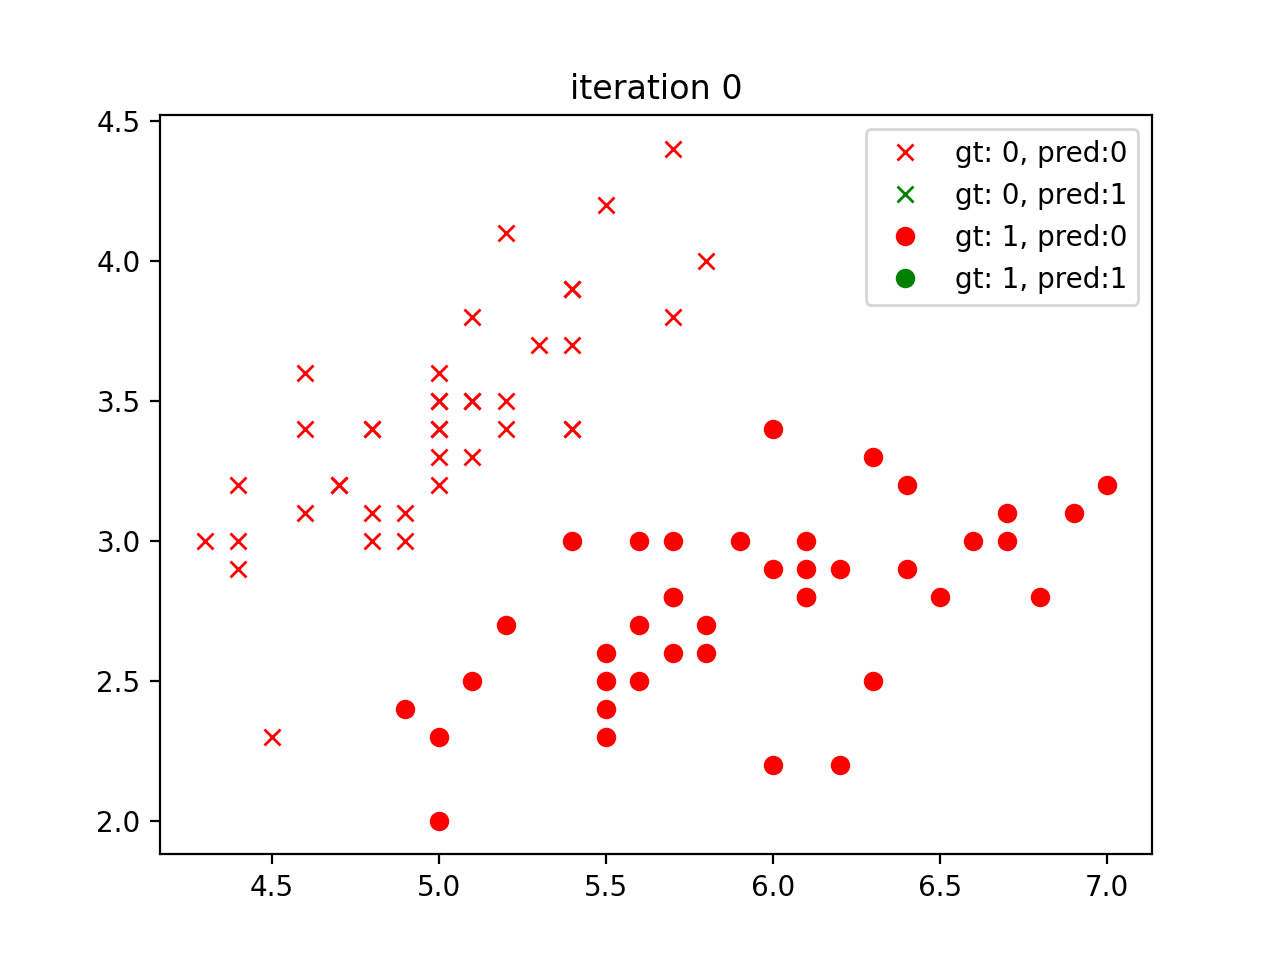

loss at iteration 1000 : 3.984428796134771
loss at iteration 2000 : 3.4691184785438125
loss at iteration 3000 : 3.07553683902209


<IPython.core.display.Javascript object>


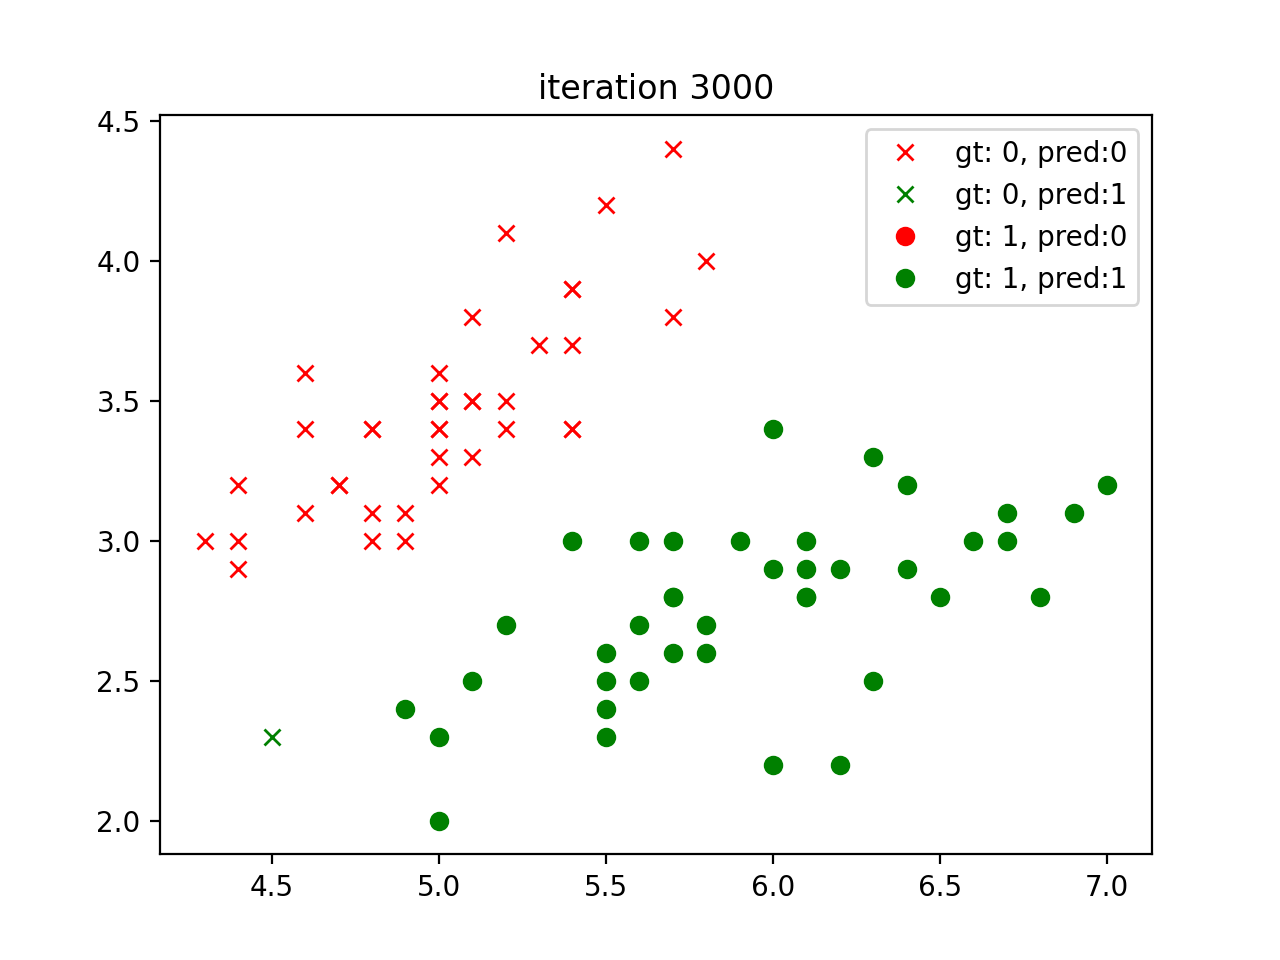

loss at iteration 4000 : 2.7552883314439316
loss at iteration 5000 : 2.491251973407711
loss at iteration 6000 : 2.271967255008404


<IPython.core.display.Javascript object>


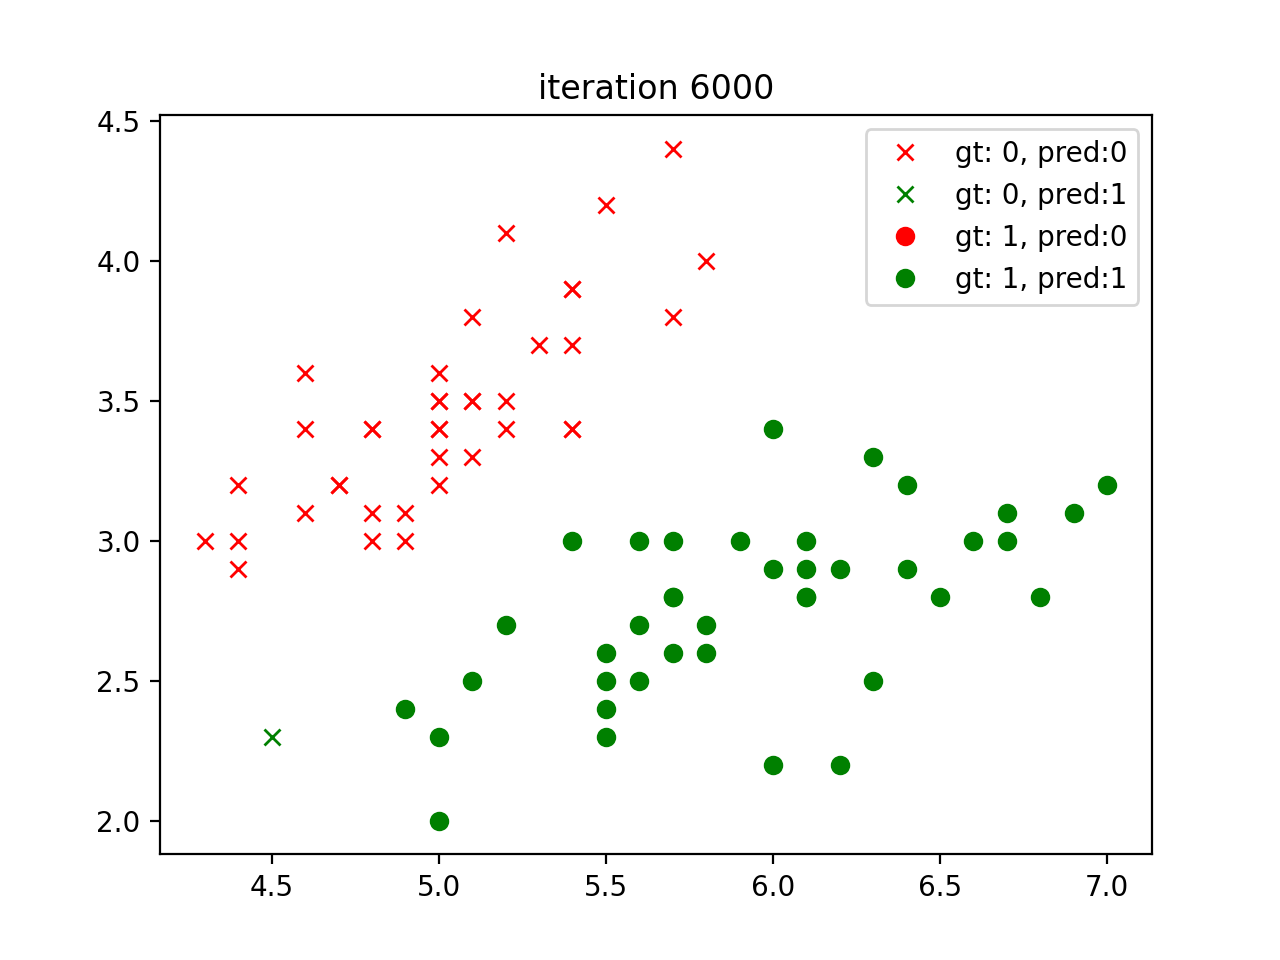

loss at iteration 7000 : 2.0883145547625817
loss at iteration 8000 : 1.932999898327418
loss at iteration 9000 : 1.800298833750046


<IPython.core.display.Javascript object>


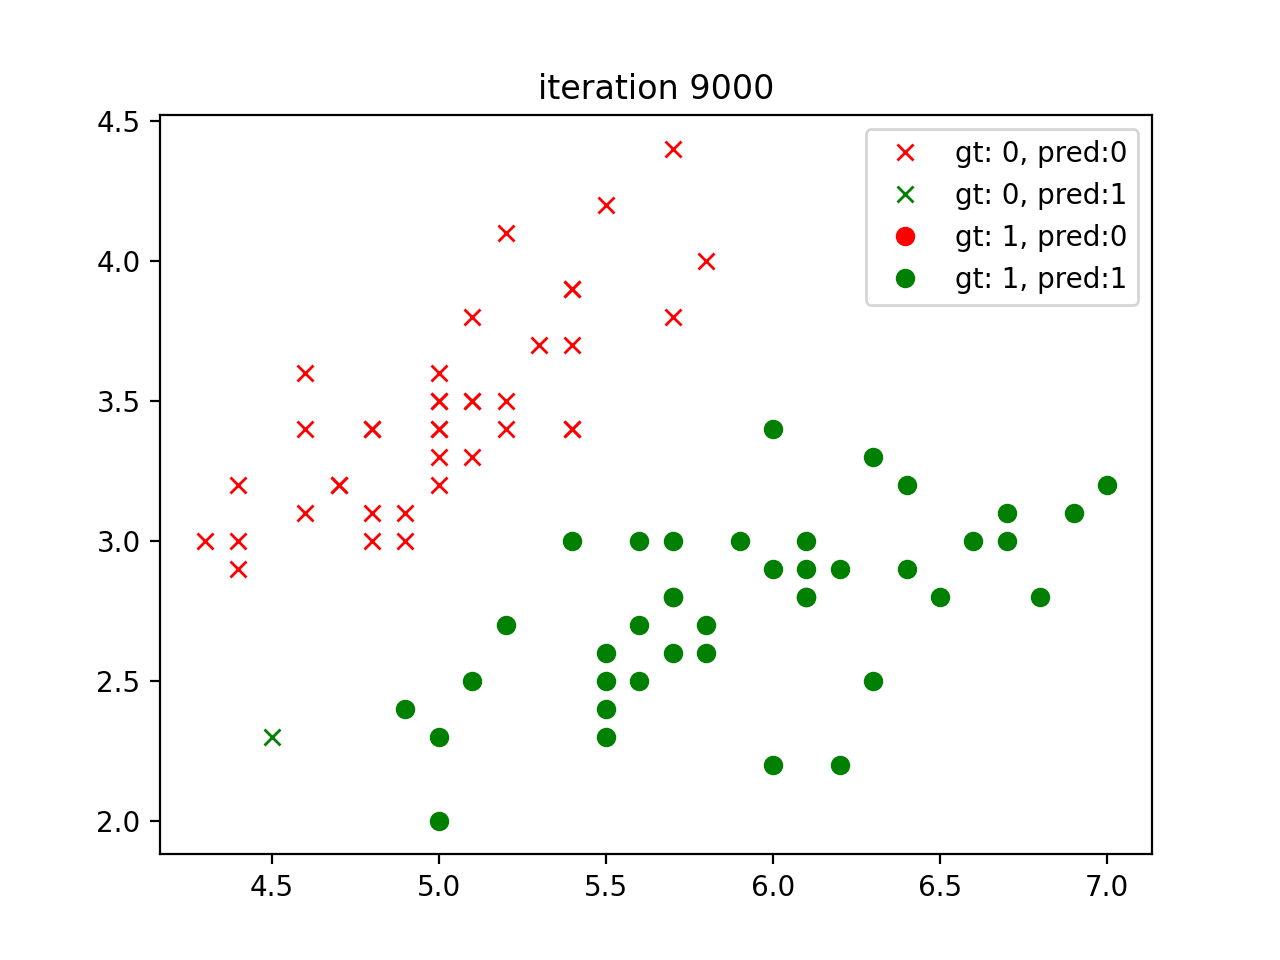

loss at iteration 10000 : 1.685772349833372
loss at iteration 11000 : 1.5859881917102505
loss at iteration 12000 : 1.4982834002161332


<IPython.core.display.Javascript object>


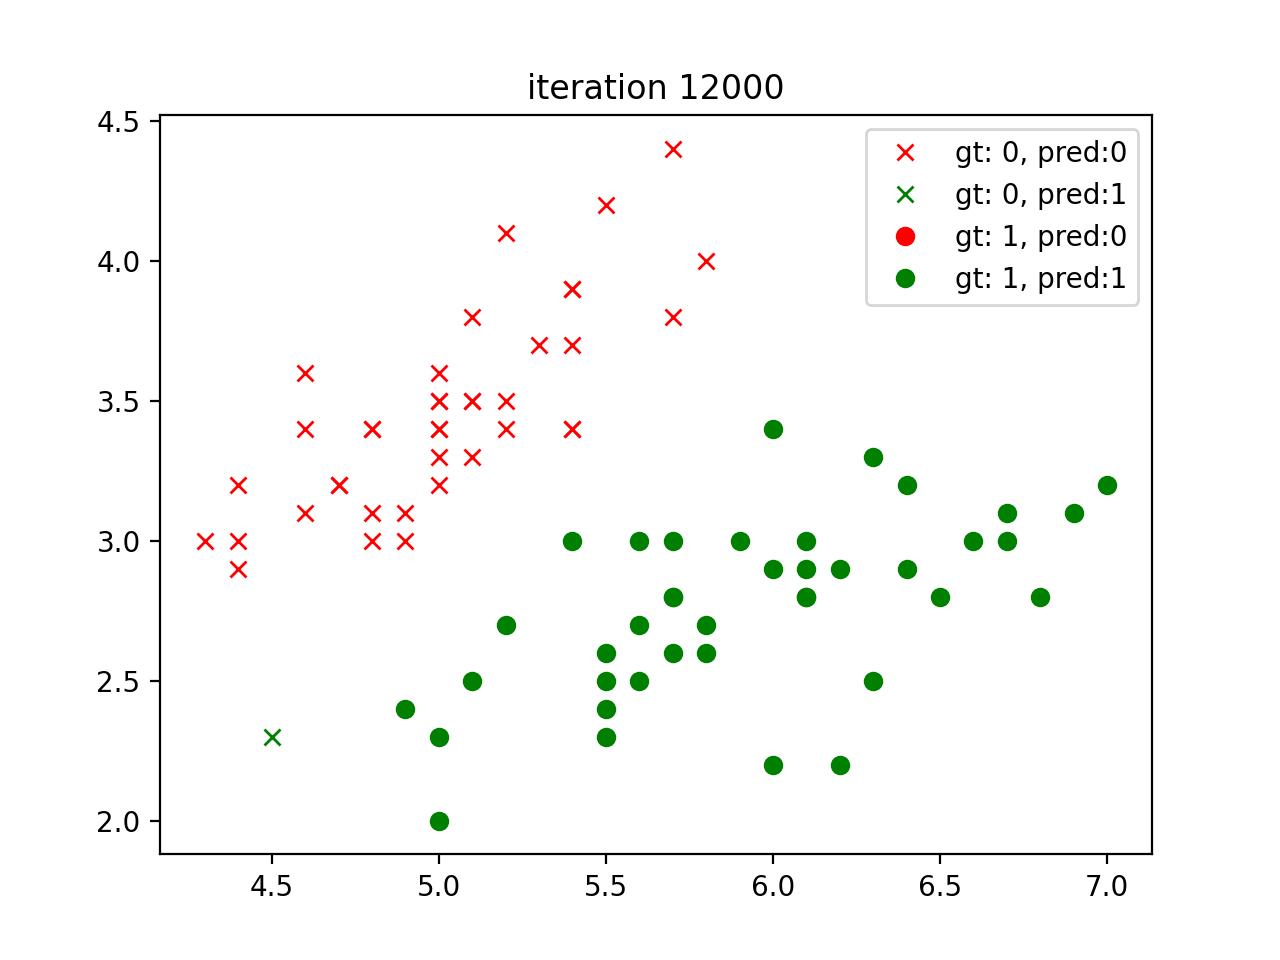

<IPython.core.display.Javascript object>


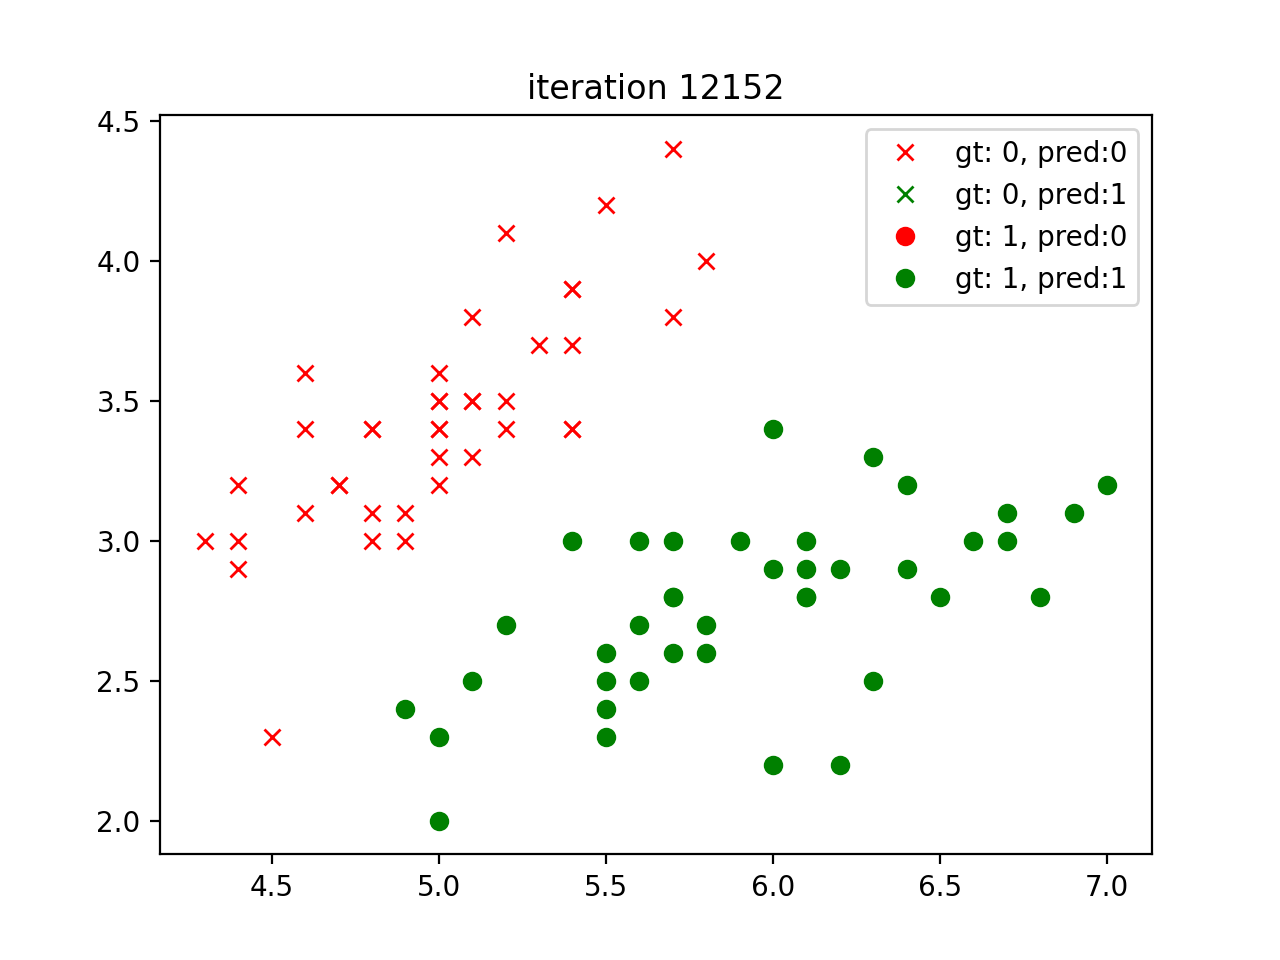

In [11]:
weights = logistic_regression_train(data_train, labels_train, max_iters=100000, lr=1e-2, print_period=1000, plot_period=3000)

<IPython.core.display.Javascript object>


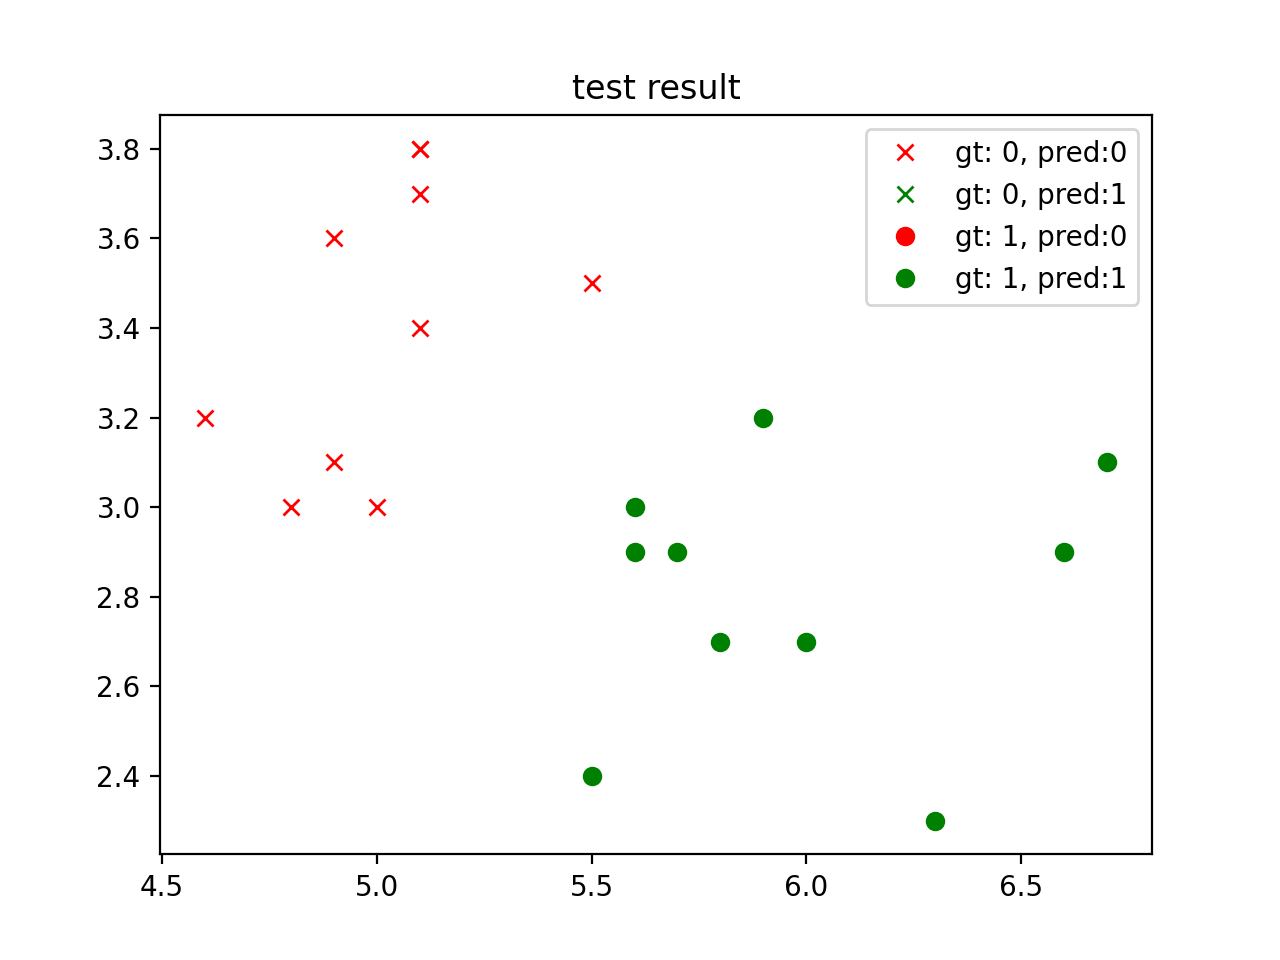

Accuracy is 1.0


In [12]:
predictions = logistic_regression_classify(data_test, weights)
fig = helpers.visualize_predictions(data=data_test, labels_gt=labels_test, labels_pred=predictions)
plt.title("test result")
print("Accuracy is", accuracy(labels_test, predictions))

# 3 Different Data

Let us now use the same dataset, with the same 2 features as before, but change the 2 classes to *versicolor* and *virginica*. As we use the features and the same number of classes, our dataset as the same form as before:

  - data: $\Xb \in \real^{N \times 3}$, $\forall \xb_i \in \Xb: \xb_i \in \real^{3}$ (2 features and the bias)
  - labels: $\yb \in \real^{N}$, $\forall y_i \in \yb: y_i \in \{0, 1\}$ 


<IPython.core.display.Javascript object>


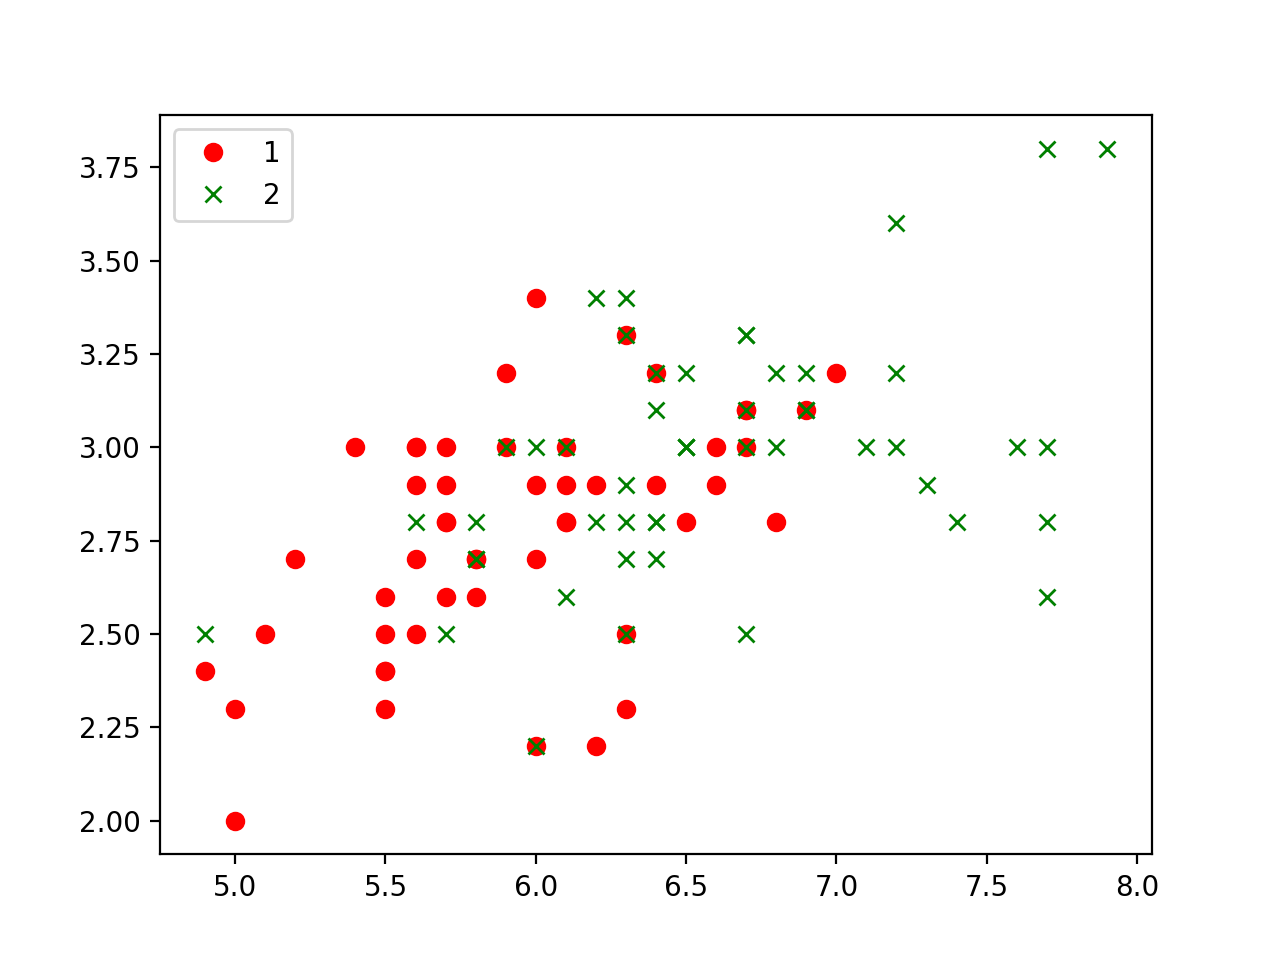

In [13]:
# Loads the data and split them into trian and test subsets.
data, labels = helpers.load_ds_iris(sep_l=True, sep_w=True, pet_l=False, pet_w=False,
                              setosa=False, versicolor=True, virginica=True, addbias=True)
fig = helpers.scatter2d_multiclass(data, labels)

num_samples = data.shape[0]

fraction_train = 0.8
np.random.seed(0)
rinds = np.random.permutation(num_samples)

data_train = data[rinds[:int(num_samples * fraction_train)]] 
labels_train = labels[rinds[:int(num_samples * fraction_train)]]  
labels_train[labels_train==2] = 0

data_test = data[rinds[int(num_samples * fraction_train):]] 
labels_test = labels[rinds[int(num_samples * fraction_train):]]  
labels_test[labels_test==2] = 0




Now you can perform training and evaluation on this dataset. We leave this part to you. 
Note: We recommend reducing the plotting period of the `logistic_regression_train` function.

loss at iteration 0 : 54.98251182450983


<IPython.core.display.Javascript object>


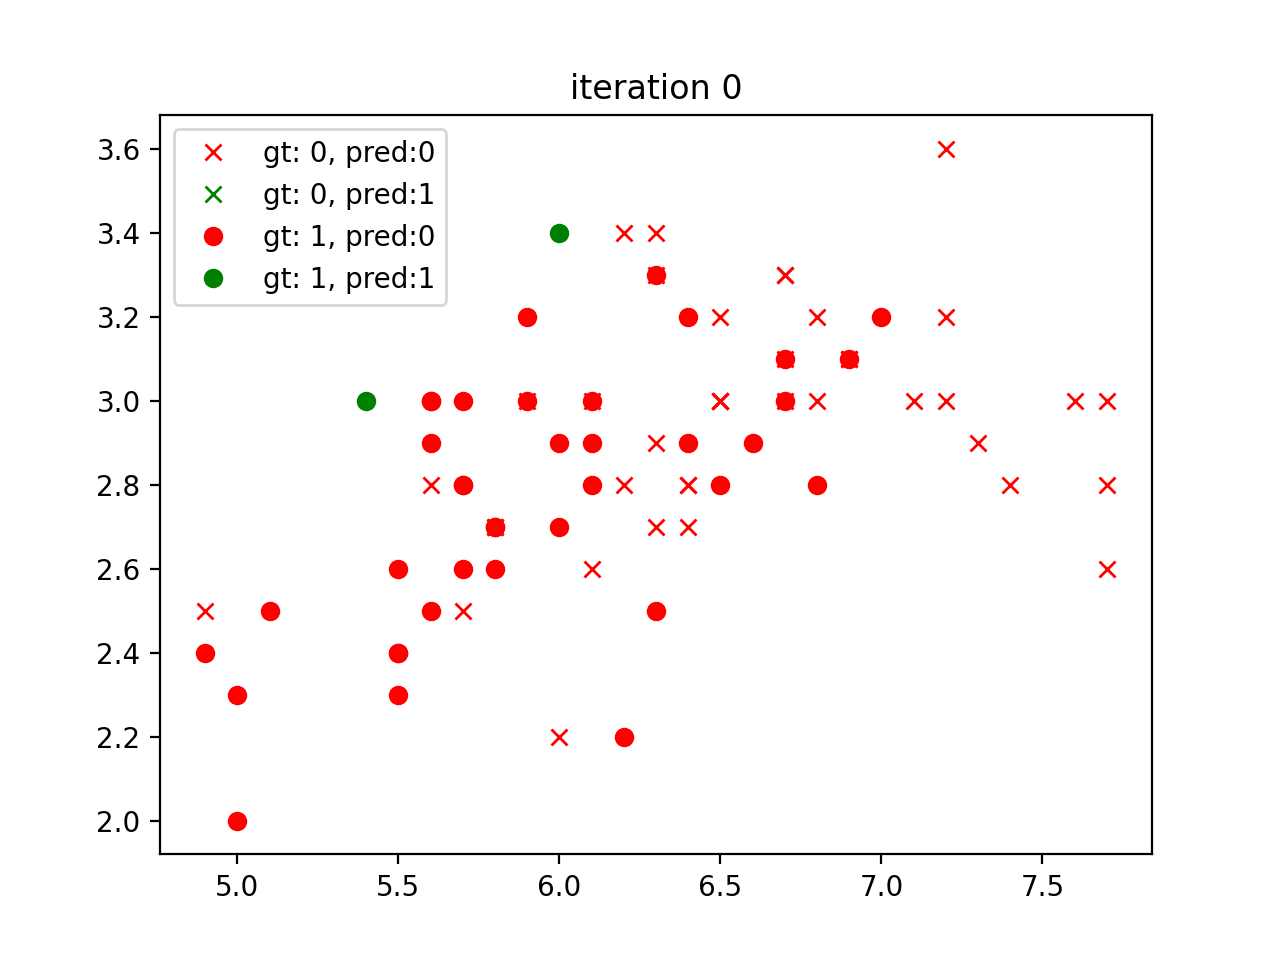

loss at iteration 100 : 54.229877148403965
loss at iteration 200 : 53.623597535125896
loss at iteration 300 : 53.12222766267737
loss at iteration 400 : 52.69904085823519
loss at iteration 500 : 52.33468550529862
loss at iteration 600 : 52.015122930391115
loss at iteration 700 : 51.730122577723556
loss at iteration 800 : 51.47218348901235
loss at iteration 900 : 51.23576717948411
loss at iteration 1000 : 51.01675279950362
loss at iteration 1100 : 50.8120493337679
loss at iteration 1200 : 50.61931840125277
loss at iteration 1300 : 50.4367750461609
loss at iteration 1400 : 50.26304373162226
loss at iteration 1500 : 50.09705360949461
loss at iteration 1600 : 49.937961900609594
loss at iteration 1700 : 49.785097519480935
loss at iteration 1800 : 49.63791936960068
loss at iteration 1900 : 49.49598533461712
loss at iteration 2000 : 49.358929112654415
loss at iteration 2100 : 49.22644283314656
loss at iteration 2200 : 49.09826395847769
loss at iteration 2300 : 48.97416537542777
loss at iterati

loss at iteration 20400 : 44.4701326024786
loss at iteration 20500 : 44.46832058938023
loss at iteration 20600 : 44.46654330751774
loss at iteration 20700 : 44.464800057870804
loss at iteration 20800 : 44.463090156427114
loss at iteration 20900 : 44.461412933833316
loss at iteration 21000 : 44.459767735054925
loss at iteration 21100 : 44.45815391904479
loss at iteration 21200 : 44.45657085841999
loss at iteration 21300 : 44.45501793914693
loss at iteration 21400 : 44.45349456023435
loss at iteration 21500 : 44.45200013343404
loss at iteration 21600 : 44.45053408294912
loss at iteration 21700 : 44.44909584514949
loss at iteration 21800 : 44.4476848682946
loss at iteration 21900 : 44.446300612262874
loss at iteration 22000 : 44.444942548288026
loss at iteration 22100 : 44.443610158701844
loss at iteration 22200 : 44.44230293668335
loss at iteration 22300 : 44.44102038601406
loss at iteration 22400 : 44.43976202083944
loss at iteration 22500 : 44.438527365436016
loss at iteration 22600 : 

loss at iteration 40600 : 44.374827092179764
loss at iteration 40700 : 44.37478172171699
loss at iteration 40800 : 44.374737145368385
loss at iteration 40900 : 44.374693349110345
loss at iteration 41000 : 44.37465031917017
loss at iteration 41100 : 44.37460804202149
loss at iteration 41200 : 44.37456650437974
loss at iteration 41300 : 44.374525693197796
loss at iteration 41400 : 44.374485595661646
loss at iteration 41500 : 44.37444619918612
loss at iteration 41600 : 44.374407491410764
loss at iteration 41700 : 44.37436946019575
loss at iteration 41800 : 44.37433209361786
loss at iteration 41900 : 44.37429537996651
loss at iteration 42000 : 44.37425930774001
loss at iteration 42100 : 44.37422386564163
loss at iteration 42200 : 44.37418904257598
loss at iteration 42300 : 44.374154827645334
loss at iteration 42400 : 44.374121210146036
loss at iteration 42500 : 44.374088179564986
loss at iteration 42600 : 44.37405572557624
loss at iteration 42700 : 44.37402383803753
loss at iteration 42800

loss at iteration 60100 : 44.37230622671031
loss at iteration 60200 : 44.37230472846073
loss at iteration 60300 : 44.372303256045214
loss at iteration 60400 : 44.372301809017564
loss at iteration 60500 : 44.37230038693933
loss at iteration 60600 : 44.37229898937963
loss at iteration 60700 : 44.372297615915045
loss at iteration 60800 : 44.3722962661295
loss at iteration 60900 : 44.37229493961411
loss at iteration 61000 : 44.372293635967054
loss at iteration 61100 : 44.3722923547935
loss at iteration 61200 : 44.372291095705435
loss at iteration 61300 : 44.37228985832154
loss at iteration 61400 : 44.37228864226711
loss at iteration 61500 : 44.372287447173925
loss at iteration 61600 : 44.37228627268015
loss at iteration 61700 : 44.37228511843017
loss at iteration 61800 : 44.37228398407457
loss at iteration 61900 : 44.372282869269945
loss at iteration 62000 : 44.37228177367884
loss at iteration 62100 : 44.37228069696965
loss at iteration 62200 : 44.37227963881648
loss at iteration 62300 : 4

loss at iteration 81800 : 44.37222125348266
loss at iteration 81900 : 44.3722212188524
loss at iteration 82000 : 44.37222118481758
loss at iteration 82100 : 44.37222115136794
loss at iteration 82200 : 44.372221118493414
loss at iteration 82300 : 44.372221086184126
loss at iteration 82400 : 44.37222105443035
loss at iteration 82500 : 44.37222102322251
loss at iteration 82600 : 44.372220992551256
loss at iteration 82700 : 44.372220962407326
loss at iteration 82800 : 44.37222093278167
loss at iteration 82900 : 44.37222090366537
loss at iteration 83000 : 44.37222087504968
loss at iteration 83100 : 44.372220846925956
loss at iteration 83200 : 44.37222081928577
loss at iteration 83300 : 44.37222079212081
loss at iteration 83400 : 44.37222076542287
loss at iteration 83500 : 44.372220739183945
loss at iteration 83600 : 44.37222071339613
loss at iteration 83700 : 44.372220688051684
loss at iteration 83800 : 44.37222066314297
loss at iteration 83900 : 44.3722206386625
loss at iteration 84000 : 4

<IPython.core.display.Javascript object>


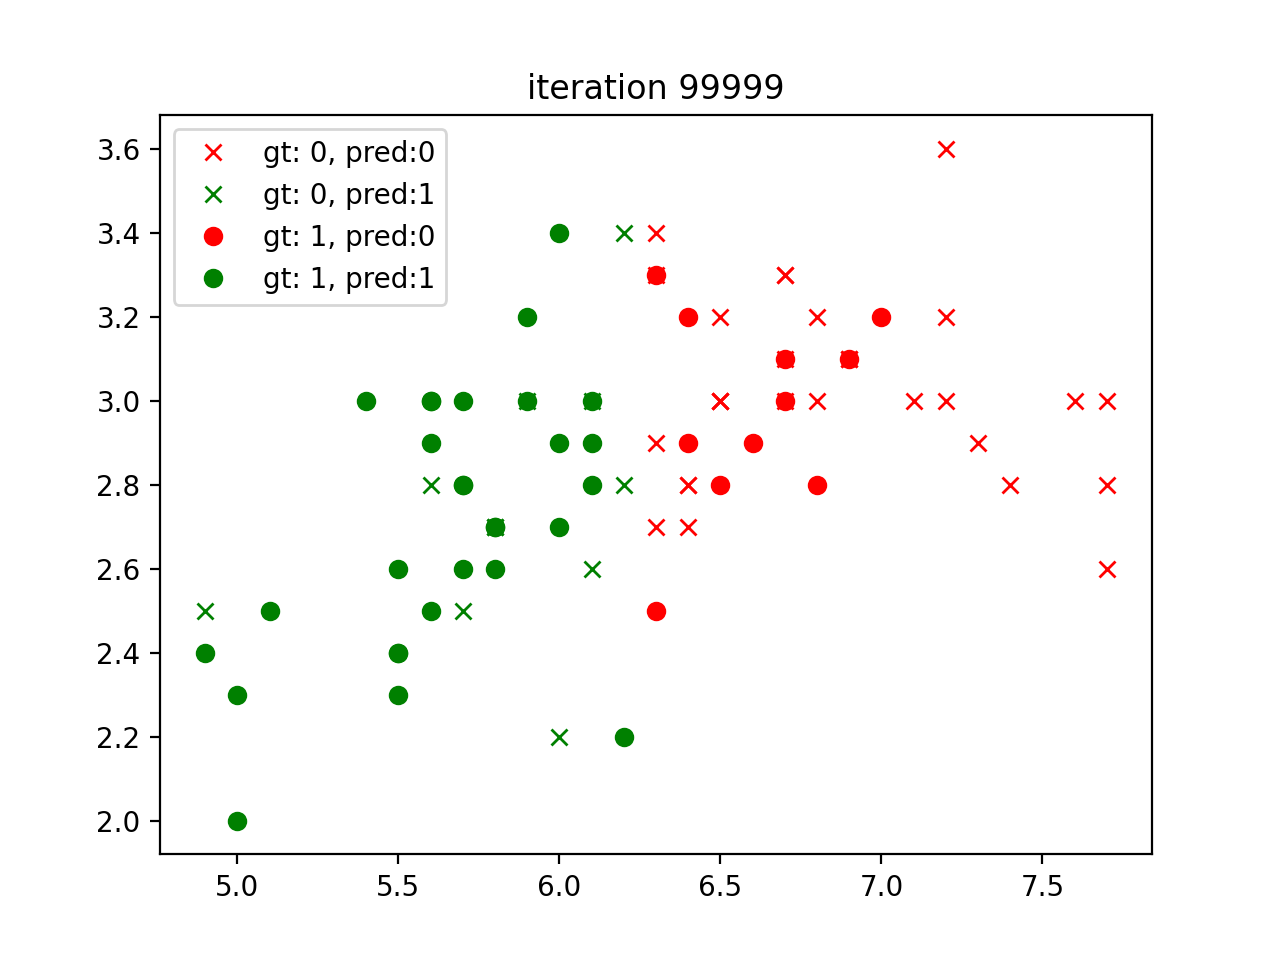

<IPython.core.display.Javascript object>


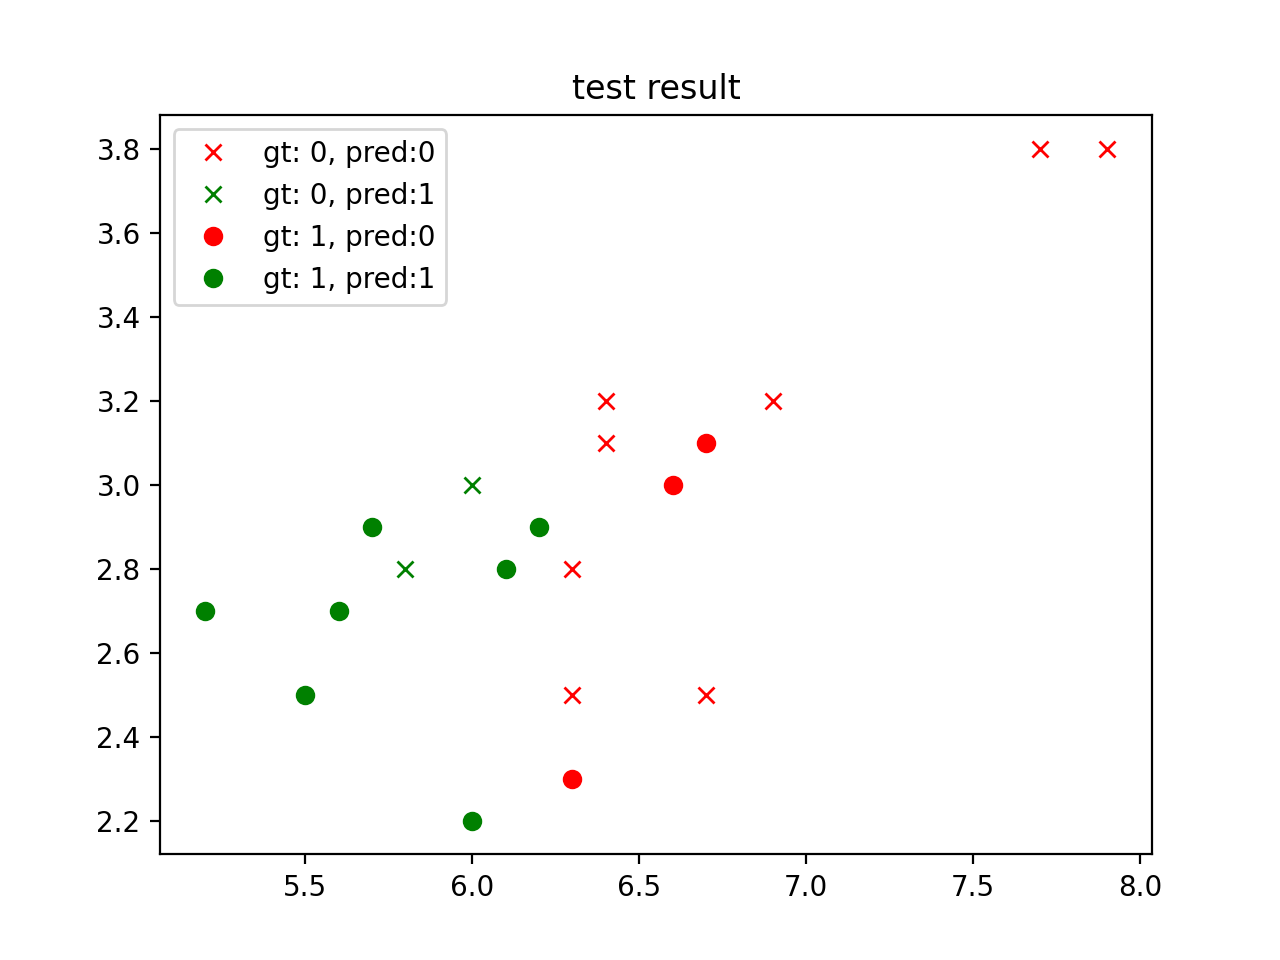

Accuracy is 0.75


In [14]:
#Train
weights = logistic_regression_train(data_train, labels_train, max_iters=100000, lr=1e-3, print_period=100, plot_period=100000)
#Predict
predictions = logistic_regression_classify(data_test, weights)
#Calculate accuracy
fig = helpers.visualize_predictions(data=data_test, labels_gt=labels_test, labels_pred=predictions)
plt.title("test result")
print("Accuracy is", accuracy(labels_test, predictions))

**Q: Comment on the accuracy. What is the difference between the dataset  in the first part and this one?**
 
The accuracy here is much lower than in the first part. This is because, for these two features, the classes *virginia* and *versicolor* are not linearly separable. In fact, these classes cannot be perfectly separated even with a non-linear boundary as some of the samples of both classes completely overlap. In the first dataset, the two classes were linearly separable.